
# Construccion de un sistema de recomendacion

## Construccion de un *pipeline* (filtro)


In [1]:
#importamos librerías
from sklearn.datasets import samples_generator #generamos un toyset
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#generamos un toyset: 150 observaciones con 25 características de las
#cuales 6 son informativas y adicionalmente 0 redundantes
X, y = samples_generator.make_classification(n_samples = 150,
                                            n_features = 25,
                                            n_classes = 3,
                                            n_informative = 6,
                                            n_redundant = 0,
                                            random_state = 7)

In [3]:
#creamos el primer módulo del pipeline, selector de características
selector = SelectKBest(f_regression, k = 9)
#creamos el segundo módulo del pipeline, clasificador BEA
clasificador = ExtraTreesClassifier(n_estimators = 60, max_depth = 4)
#creamos el pipeline
pipeline = Pipeline([('selec', selector),('elelegido',clasificador)])
pipeline.set_params(selec__k = 7, elelegido__n_estimators = 30)

Pipeline(steps=[('selec', SelectKBest(k=7, score_func=<function f_regression at 0x0000024431C01A60>)), ('elelegido', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [4]:
#entrenamos el pipeline
pipeline.fit(X, y)
#y realizamos la predicción de las salidas
salida = pipeline.predict(X)
print(salida)

[1 2 2 0 2 0 2 1 0 1 1 2 1 0 2 2 1 0 1 1 0 2 1 1 2 2 0 0 1 2 1 0 1 0 2 2 1
 1 2 2 2 0 1 2 2 1 1 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 1 1 1 2 0 1 0 2
 0 0 1 2 2 0 0 1 2 2 0 0 0 0 2 2 2 1 2 0 2 1 2 1 1 0 1 1 1 1 2 2 0 2 0 1 1
 0 2 1 0 0 1 1 1 1 0 0 0 1 2 1 0 0 2 1 2 0 0 1 1 1 1 0 1 1 1 1 0 2 0 1 2 0
 2 2]


In [5]:
#score mide la eficiencia 0-1
print("\nEl score del pipeline es: ", pipeline.score(X,y))


El score del pipeline es:  0.86


In [6]:
#revisamos las características del selector (por carpintería)
status = pipeline.named_steps['selec'].get_support()
print(status)

[False False False False  True False False  True  True False False False
  True False  True False False  True False False False False  True False
 False]


In [7]:
#este cuadro es carpintería
carac_selec = [i for i, x in enumerate(status) if x]
print(carac_selec)
print('\nLos índices seleccinados son:',' '.join([str(x) for x in carac_selec]))

[4, 7, 8, 12, 14, 17, 22]

Los índices seleccinados son: 4 7 8 12 14 17 22


# Algoritmo Nearest-Neighbors NN

In [8]:
#importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [9]:
#creamos un toyset de 2D
X = np.array([[2.1,1.3], [1.3,3.2], [2.9, 2.5], [2.7,5.4], [3.8,0.9],
              [7.3, 2.1], [4.2,6.5],[3.8,3.7],[2.5,4.1],[3.4,1.9],
              [5.7,3.5], [6.1,4.3], [5.1,2.2],[6.2,1.1]])
print(X)
            

[[ 2.1  1.3]
 [ 1.3  3.2]
 [ 2.9  2.5]
 [ 2.7  5.4]
 [ 3.8  0.9]
 [ 7.3  2.1]
 [ 4.2  6.5]
 [ 3.8  3.7]
 [ 2.5  4.1]
 [ 3.4  1.9]
 [ 5.7  3.5]
 [ 6.1  4.3]
 [ 5.1  2.2]
 [ 6.2  1.1]]


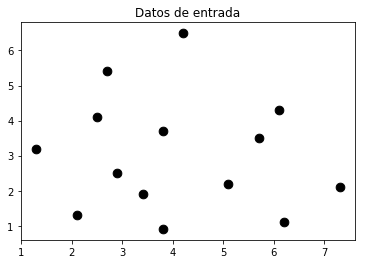

In [10]:
#definimos el número de vecinos
k = 3
#creamos una muestra para el test
test = [4.3, 2.7]
#-------Este cuadro es carpintería-----------------------
#graficamos los datos de entrada
plt.figure()
plt.title('Datos de entrada')
plt.scatter(X[:,0], X[:,1], marker = 'o', s = 75, color = 'black')
plt.show()

#--------------------------------------------------------

In [11]:
#creamos el modelo de NN
modelo_nn = NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(X)
distancias, indices = modelo_nn.kneighbors(test)
print(indices)
#--------------------------------------------------------------
#imprimos los vecinos más cercanos más bonito
print('\nLos k vecinos más cercanos son: ')
for rank, index in enumerate(indices[0][:k], start = 1):
    print(str(rank) + '====>', X[index])  
#-------------------------------------------------------------

[[12  7  9]]

Los k vecinos más cercanos son: 
1====> [ 5.1  2.2]
2====> [ 3.8  3.7]
3====> [ 3.4  1.9]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


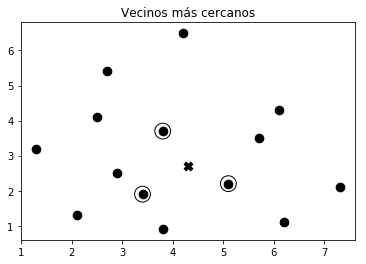

In [12]:
#-----------------------------------------------------------
#visualizamos el resultado del algoritmo
plt.figure()
plt.title('Vecinos más cercanos')
plt.scatter(X[:,0], X[:,1], marker = 'o', s = 75, color = 'k')
plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], marker = 'o',
           s = 250, color = 'k', facecolors = 'none')
plt.scatter(test[0], test[1], marker = 'X', s = 75, color = 'k')
plt.show()

#-----------------------------------------------------------

## Algoritmo para clasificador *k* -NN

In [13]:
#cargamos librerías
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

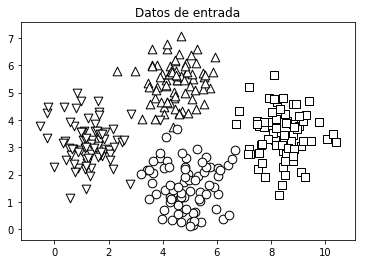

In [14]:
#cargamos los datos
archivo = 'data_knn.txt'
data = np.genfromtxt(archivo, delimiter=',' ,skip_header = True)
X, y = data[:,:-1], data[:,-1].astype(np.int)
#print(y)
#--------------------------------------------------------
#--------------------------------------------------------
plt.figure()
plt.title('Datos de entrada')
marcadores = 'v^os'
mapper = [marcadores[i] for i in y] #repite la secuencia para llegar al tamaño de y
#print(mapper)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i],
               s = 75, edgecolors = 'black', facecolors = 'white')
plt.show()

#--------------------------------------------------------

In [15]:
#definimos el número de vecinos
NN = 6
#creamos el clasificador
clasificador = neighbors.KNeighborsClassifier(NN, 
                                              weights = 'distance')
#entrenamo el clasificador
clasificador.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

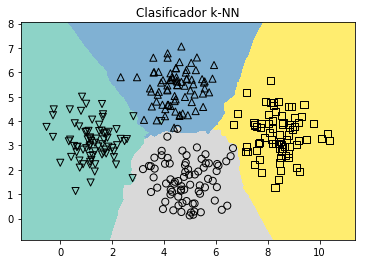

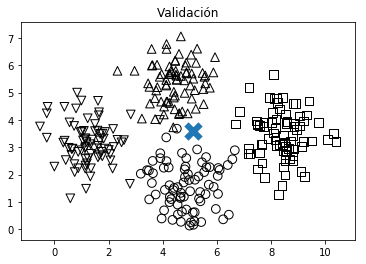

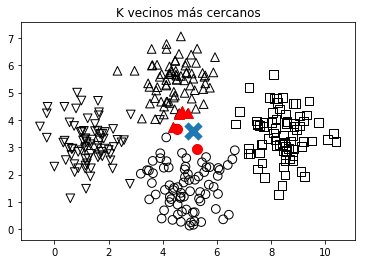

In [18]:
#---------------------------------------------------------
#visualizamos los resultados del clasificador
paso = 0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, paso),
                                np.arange(y_min, y_max, paso))
#generamos la malla de colores de acuerdo a la predicción del
#clasificador
salida = clasificador.predict(np.c_[x_values.ravel(), y_values.ravel()])
salida = salida.reshape(x_values.shape)
#creamos el handle de la figura
plt.figure()
#hacemos la malla
plt.pcolormesh(x_values, y_values, salida, cmap = cm.Set3)
#graficamos los puntos de entrada
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i],
               s = 50, edgecolor = 'black', facecolors = 'none')
#fijamos los límites de la figura
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('Clasificador k-NN')
#creamos un punto de test o validación
test = [5.1, 3.6]
#generamos un nuevo handle
plt.figure()
plt.title('Validación')
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i],
               s = 75, edgecolor = 'black', facecolors = 'none')
plt.scatter(test[0], test[1], marker = 'x', linewidth = 6, s = 200)
#extraemos los k vecinos más cercanos
_,indices = clasificador.kneighbors([test])
indices = indices.astype(np.int)[0]

#generamos un nuevo handle para graficar los k vecinos más cercanos
plt.figure()
plt.title('K vecinos más cercanos')
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i],
               s = 75, edgecolor = 'black', facecolors = 'none')
plt.scatter(test[0], test[1], marker = 'x', linewidth = 6, s = 200)
for i in indices:
    plt.scatter(X[i,0], X[i,1], marker = mapper[y[i]], 
                s = 100, facecolors = 'red' )
plt.show()
#------------------------------------------------------------------

In [21]:
print('Predicción', clasificador.predict([test])[0])

Predicción 1
